<a href="https://colab.research.google.com/github/GermanBuenoLozano/AI-and-data-analysis-subject-and-projects/blob/main/Aire_de_barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamiento de datos con pandas::

> Arnau Gonzalez Almirall


> German Bueno Lozano





En primer lugar se importan las librerias que vamos a necesitar en este caso


*   Pandas
*   Matplotlib

El archivo con el que se ha probado el codigo es: Qualitat_aire_detall

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

con el metodo **.read_csv()** leemos el archivo


In [ ]:
data= pd.read_csv('/content/Qualitat_Aire_Detall.csv')
data.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,43,999,2025,2,11,25.9,...,14.7,V,19.1,V,21.2,V,22.0,V,27.1,V
1,8,Barcelona,19,Barcelona,43,999,2025,2,12,25.3,...,20.6,V,22.5,V,21.7,V,25.5,V,28.8,V
2,8,Barcelona,19,Barcelona,43,999,2025,2,13,31.1,...,18.0,V,24.8,V,27.7,V,26.3,V,29.7,V
3,8,Barcelona,19,Barcelona,43,999,2025,2,14,NaN,...,16.4,V,NaN,N,NaN,N,NaN,N,NaN,N
4,8,Barcelona,19,Barcelona,54,999,2025,2,11,15.2,...,12.6,V,18.5,V,20.2,V,15.5,V,21.2,V


Eliminamos las columnas que contienen informacion repetida

In [ ]:
df=pd.DataFrame(data)
df.drop("PROVINCIA",axis=1, inplace=True)
df.drop("CODI_PROVINCIA",axis=1, inplace=True)
df.drop("CODI_MUNICIPI",axis=1, inplace=True)
df.drop("MUNICIPI",axis=1, inplace=True)
df.head()

,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,V01,H02,V02,H03,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,43,999,2025,2,11,25.9,V,26.1,V,25.3,...,14.7,V,19.1,V,21.2,V,22.0,V,27.1,V
1,43,999,2025,2,12,25.3,V,23.3,V,NaN,...,20.6,V,22.5,V,21.7,V,25.5,V,28.8,V
2,43,999,2025,2,13,31.1,V,35.7,V,28.5,...,18.0,V,24.8,V,27.7,V,26.3,V,29.7,V
3,43,999,2025,2,14,NaN,N,32.0,V,28.3,...,16.4,V,NaN,N,NaN,N,NaN,N,NaN,N
4,54,999,2025,2,11,15.2,V,19.3,V,16.7,...,12.6,V,18.5,V,20.2,V,15.5,V,21.2,V


In [ ]:
for col in df.columns:
  if df[col][0] == "V":
    df.drop(col,axis=1, inplace=True)

,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,43,999,2025,2,11,25.9,26.1,25.3,23.6,18.3,...,17.1,19.9,18.5,17.3,16.5,14.7,19.1,21.2,22.0,27.1
1,43,999,2025,2,12,25.3,23.3,NaN,22.3,25.0,...,19.0,16.6,16.0,15.6,17.8,20.6,22.5,21.7,25.5,28.8
2,43,999,2025,2,13,31.1,35.7,28.5,30.8,28.0,...,22.7,21.0,18.5,17.9,19.1,18.0,24.8,27.7,26.3,29.7
3,43,999,2025,2,14,NaN,32.0,28.3,25.3,21.8,...,16.7,16.3,14.8,14.6,17.0,16.4,NaN,NaN,NaN,NaN
4,54,999,2025,2,11,15.2,19.3,16.7,18.3,15.5,...,15.1,16.2,17.1,12.6,11.2,12.6,18.5,20.2,15.5,21.2


Al hacer un primer plot, nos damos cuenta que los NaN nos putean


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

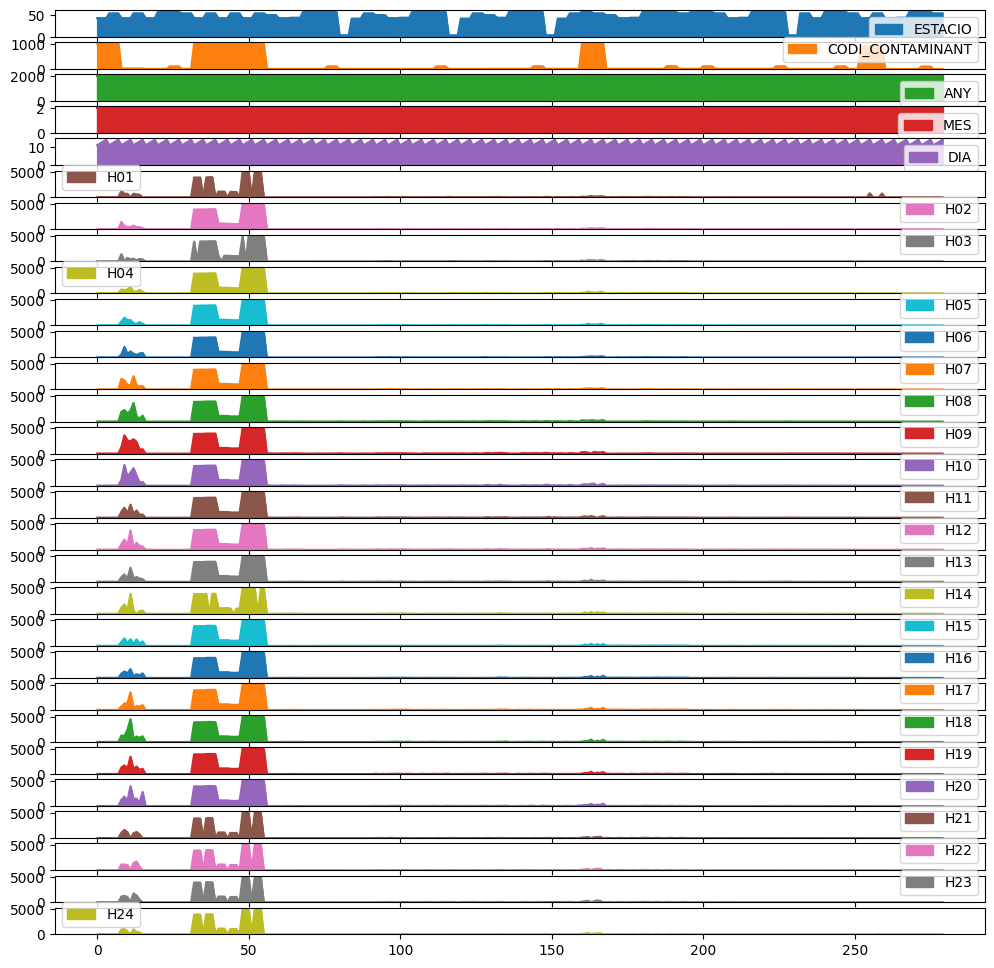

In [ ]:
df.plot.area(figsize=(12, 12), subplots=True)

procedemos a eliminar las filas que contengan un Nan

In [ ]:
# Eliminar filas con al menos un NaN
print("El df normal es de", df.shape)
df_sin_nan = df.dropna()
print("el df sin NaN es de", df_sin_nan.shape)

El df normal es de (280, 29)
el df sin NaN es de (193, 29)


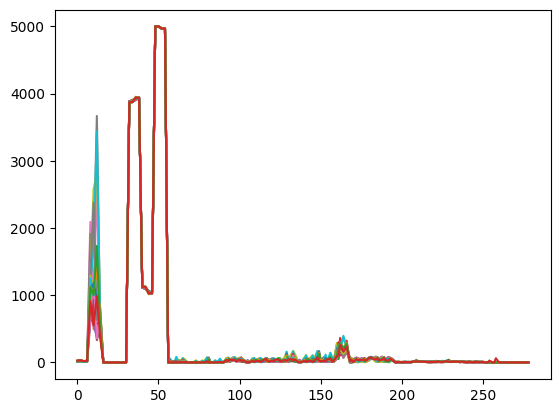

In [ ]:
for col in df_sin_nan.columns:
  if col[0] == "H":
    graph=df_sin_nan[col].plot()

No me cuadra mucho esos datos que salen al principio, no me inspira confianza un pico tan alto la averdad, en el siguiente fragmento de codigo hago un zoom

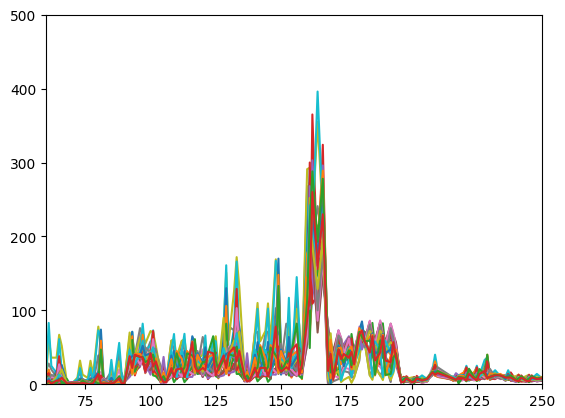

In [ ]:
for col in df_sin_nan.columns:
  if col[0] == "H":
    graph=df_sin_nan[col].plot()
    graph.set_xlim(60, 250)
    graph.set_ylim(0, 500)
